In [3]:
import numpy as np

from human_terms_network import Human_Terms_Network
from dataset_load import *
from lr_baseline import LRBaseline

In [4]:
path = r"..\..\data\reviews_Amazon_Instant_Video_5.json.gz"

X, y = extract_review_amazon(path, 'reviewText')

y_label = y
# discard the review with 3. [1,2] = 0, [4,5] = 0
neutral_indices = np.where(y_label == 3)[0]
y_label[y_label<3] = 0
y_label[y_label>3] = 1

X_discarded = np.delete(X,neutral_indices)
y_discarded = np.delete(y_label, neutral_indices)

from sklearn.model_selection import train_test_split

X_train_split, X_test_split, y_train_amazon, y_test_amazon = train_test_split(
    X_discarded, y_discarded)

X_train_corpus_update = update_corpus_contraction(X_train_split)
X_test_corpus_update = update_corpus_contraction(X_test_split)



(75, 2)
corpus update start
corpus update end

(75, 2)
corpus update start
corpus update end



In [5]:
word_list, connotation = load_unigrams('./amazon-video-unigrams-more.txt', X_train_corpus_update, y_train_amazon)

In [6]:
y_train_agreement, y_test_agreement = generate_appearance(X_train_corpus_update, X_test_corpus_update, 
                                                          word_list, connotation)

In [7]:
av_baseline = LRBaseline(X_train_corpus_update, X_test_corpus_update, y_train_amazon, y_test_amazon, 
                           human_terms=word_list)

In [8]:
# (train, test)

print(av_baseline.baseline())
print(av_baseline.baseline(penalty='l1'))
print(av_baseline.human_terms_baseline())
print(av_baseline.human_terms_baseline(penalty='l1'))

(0.9550275259067358, 0.9281117182756528)
(0.9527202072538861, 0.9281117182756528)
(0.9126862046632125, 0.9084395871281117)
(0.9128886010362695, 0.9083181542197936)


In [9]:
len(word_list)

78

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
clf = LogisticRegression(penalty='l1')
X_train = av_baseline.baseline_cv.transform(X_train_corpus_update)
X_test = av_baseline.baseline_cv.transform(X_test_corpus_update)

clf.fit(X_train, y_train_amazon)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [14]:
weight = clf.coef_.flatten()

In [16]:
word = av_baseline.baseline_cv.get_feature_names()

In [29]:
indices = np.argsort(weight)[::-1]

for i in indices[200:300]:
    print(word[i])

times
considering
today
happen
terms
captain
sister
hanging
crime
different
know
experience
group
place
always
quite
sometimes
currently
fascinating
happy
cut
discovered
alive
start
era
makes
next
enjoy
enjoyable
keep
crazy
bit
darker
quick
former
air
think
bang
tom
head
due
especially
lead
wonderful
needed
hopefully
red
comic
date
coming
fact
recommend
available
onto
almost
allow
telling
david
god
accurate
full
hit
matter
able
huge
follows
complex
cold
between
overall
every
years
end
opening
police
means
week
cases
beauty
five
laugh
force
seasons
order
beautiful
using
top
falling
cost
friends
picked
use
violence
history
build
flick
stories
anyway
seeing
both


In [37]:
X_train = av_baseline.baseline_cv.transform(X_train_corpus_update)
X_test = av_baseline.baseline_cv.transform(X_test_corpus_update)
y_train = y_train_amazon
y_test = y_test_amazon

In [38]:
amazon_htm = Human_Terms_Network(input_shape=X_train.shape[1],
                               human_terms_shape=len(word_list),
                                domain='amazon', optimizer='adam')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1640)              0         
_________________________________________________________________
tanh_output (Dense)          (None, 1)                 1641      
Total params: 1,641
Trainable params: 1,641
Non-trainable params: 0
_________________________________________________________________
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 78)           0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 1640)         0                                            
_________________________________________

In [39]:
amazon_htm.set_data(X_train, X_test, y_train_agreement, y_test_agreement, y_train, y_test)

Train on 16551 samples, validate on 8153 samples
Epoch 1/10
16551/16551 [==============================] - 25s 2ms/step - loss: 0.2816 - mean_absolute_error: 0.2748 - acc: 0.8424 - val_loss: 0.2323 - val_mean_absolute_error: 0.2100 - val_acc: 0.8845
Epoch 2/10
16551/16551 [==============================] - 23s 1ms/step - loss: 0.2002 - mean_absolute_error: 0.1902 - acc: 0.8910 - val_loss: 0.2520 - val_mean_absolute_error: 0.2353 - val_acc: 0.8551
Epoch 3/10
16551/16551 [==============================] - 23s 1ms/step - loss: 0.1773 - mean_absolute_error: 0.1651 - acc: 0.9026 - val_loss: 0.2421 - val_mean_absolute_error: 0.2133 - val_acc: 0.8697
Epoch 4/10
16551/16551 [==============================] - 23s 1ms/step - loss: 0.1640 - mean_absolute_error: 0.1491 - acc: 0.9127 - val_loss: 0.2244 - val_mean_absolute_error: 0.1797 - val_acc: 0.8948: 0.1455 - acc: 0 - ETA: 7s - loss: 0.1557  - ETA: 5s -  - ETA: 2s - loss: 0.1617  - ETA: 0s - loss: 0.1653 - mean_absolute_error: 0.1499 - acc: 0
E

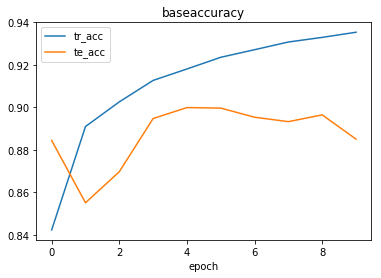

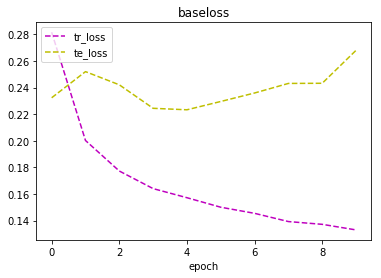

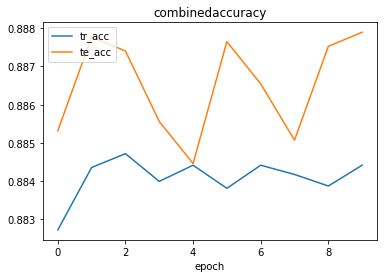

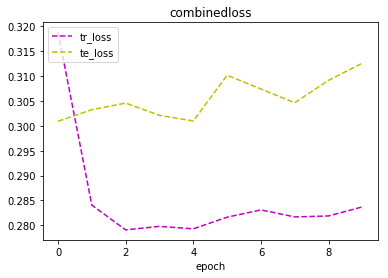

<Figure size 432x288 with 0 Axes>

In [40]:
amazon_htm.train(epochs=10)

In [41]:
amazon_htm.test(reject=True)

## has not been synchronized

5887/5887 [==============================] - 0s 46us/step


([0.2087934283742722, 0.13299619703750892, 0.9116697807313632],
 0.9998785670916819)

In [42]:
amazon_htm.test(reject=False)

8235/8235 [==============================] - 0s 47us/step


([0.326127981314007, 0.28385763886160176, 0.8828172434729812], 0)

In [ ]:
concat_after_relu = Model(inputs=combined_model.input,
                          outputs=combined_model.get_layer(layer_name).output)
concat_output = concat_after_relu.predict([X_test[idx], np.reshape(y_test_agreement[idx], (1,y_test_agreement.shape[1]))])

indices = np.where(np.sum(concat_all, axis=1)!=0)
indices = indices[0]
len(indices)

